In [5]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns 
import statsmodels.stats.proportion as proportion
from scipy.stats import ttest_ind,mannwhitneyu,shapiro,norm
from statsmodels.stats.weightstats import ztest
from tqdm import tqdm
import timeit
from scipy import stats
import math
from datetime import date, datetime, timedelta
import time
from sqlalchemy import create_engine, text
from sqlalchemy.orm import sessionmaker
import warnings
warnings.filterwarnings("ignore")

#from credential import postgres_secret,clickhouse_dwh_secret

def get_engine(user):
    if user == postgres_secret['user']:
        db_name = postgres_secret['db_name']
        password = postgres_secret['password']
        host = postgres_secret['host']
        engine = create_engine(f'postgresql://{user}:{password}@{host}:6432/{db_name}')
    elif user == clickhouse_dwh_secret['user']:
            db_name = clickhouse_dwh_secret['db_name'] 
            password = clickhouse_dwh_secret['password']
            host = clickhouse_dwh_secret['host']
            engine = create_engine(f'clickhouse://{user}:{password}@{host}:8123/{db_name}')
    return engine
    

    
def execute(SQL, user):
    start_time = time.time()  # запоминаем время начала выполнения функции
    engine = get_engine(user)
    Session = sessionmaker(bind=engine)  # sessions factory ()
    with Session() as session: # open session
        result = session.execute(text(SQL))
        df = pd.DataFrame(result.fetchall(), columns=result.keys())
        
    end_time = time.time()  # запоминаем время окончания выполнения функции
    execution_time = round(end_time - start_time,4) # вычисляем время выполнения   
    
    print(f"Время выполнения функции: {execution_time} секунд")
    print()
    return df

In [12]:
np.random.seed(102)
mydata=np.random.randint(0,101,(4,3))

In [14]:
mydata

array([[ 0, 78, 66],
       [73, 72, 45],
       [72, 73, 79],
       [ 7,  4, 38]])

In [8]:
mi = ['CA','NA','AX','TX']
mc = ['Jan','Feb','Mar']
df=pd.DataFrame(data=mydata,index=mi,columns=mc)
df

,Jan,Feb,Mar
CA,95,11,81
NA,70,63,87
AX,75,9,77
TX,40,4,63


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, CA to TX
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Jan     4 non-null      int64
 1   Feb     4 non-null      int64
 2   Mar     4 non-null      int64
dtypes: int64(3)
memory usage: 128.0+ bytes


In [12]:
pwd

'/Users/kemran/Desktop/work_files/python_files'

In [14]:
df.index

Index(['CA', 'NA', 'AX', 'TX'], dtype='object')

In [16]:
query='SELECT * FROM datamarts.mekhtiev_watchtime_by_day_distr'
df = execute(query,user='kmekhtiev')
df['date'] = df['date'].astype('datetime64[ns]')

Время выполнения функции: 23.8906 секунд



In [17]:
df = df.set_index('date')

In [18]:
df.iloc[0]

profile_id             ecac16b6-34a5-47e0-935b-69931e26d4de
client_type_general                              web_mobile
item_type                                             kinom
b2c_b2b                                                 b2c
user_type                                             trial
free_days                                                14
app_version                                      4.1.1-prod
watchtime                                                30
promo_type                                         no_promo
session_cnt                                               1
session_watch                                             0
viewing_cnt                                               2
session_cnt_ttl                                           2
session_watch_ttl                                         2
viewing_watch_cnt                                         1
Name: 2024-03-01 00:00:00, dtype: object

In [20]:
df = df.reset_index()

In [22]:
df[(df['watchtime']>100) & (df['item_type']=='kinom')]

,index,date,profile_id,client_type_general,item_type,b2c_b2b,user_type,free_days,app_version,watchtime,watchtime_session_watch,promo_type,session_cnt,session_watch
11,11,2024-09-14,29df39c0-a95a-4b49-ab15-e9207f0d1412,android,kinom,b2c,trial,30,2.52,313,32,promo,1,1
72,72,2024-09-14,6ef76299-2625-4712-a8f5-918dcfeb2f23,android,kinom,b2c,reg,no_trial_b2c,2.52,185,114,no_promo,1,2
89,89,2024-09-14,3d6d7b36-d59b-4f39-ba09-635dd1430a90,android,kinom,b2c,trial,30,2.52,167,0,promo,1,0
155,155,2024-09-14,e751a992-2b02-471e-bded-06ffa1a97d37,web_mobile,kinom,b2c,trial,14,4.9.2-prod,133,133,no_promo,2,1
173,173,2024-09-14,0b86991e-0e84-42b7-bf5e-d8b3077b5c7f,android,kinom,b2c,reg,no_trial_b2c,2.52,147,66,no_promo,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974586,974586,2024-09-09,d8e2d339-bd0b-41ee-b7ac-d9c8c924b4f2,android,kinom,b2c,subs,3,2.52,123,67,no_promo,1,1
974598,974598,2024-09-09,de9bcb87-ac57-4e35-a526-14707d86a6fd,web_mobile,kinom,b2c,trial,30,4.9.1-prod,104,74,promo,2,1
974603,974603,2024-09-09,cc11aa52-72b0-4e31-bcd0-a697ad56f8d8,web_desktop,kinom,b2c,trial,35,4.9.1-prod,314,221,promo,1,4
974608,974608,2024-09-09,098a3cc9-592f-46c4-a99c-a9eaab32a2b5,web_desktop,kinom,b2c,reg,no_trial_b2c,4.9.1-prod,253,250,no_promo,9,4


In [24]:
item = ['series','movie','tvchannel']


In [26]:
df[df['item_type'].isin(['series','movie','tvchannel'])]

,index,date,profile_id,client_type_general,item_type,b2c_b2b,user_type,free_days,app_version,watchtime,watchtime_session_watch,promo_type,session_cnt,session_watch
4,4,2024-09-14,d6ab7e2c-41a2-4c44-8ffe-f4c06100f9ca,web_desktop,tvchannel,b2c,reg,no_trial_b2c,4.9.2-prod,837,829,no_promo,11,2
5,5,2024-09-14,f1c89a5f-1ca0-44d7-abd0-27154985d218,web_desktop,movie,b2c,trial,45,4.9.2-prod,2101,2101,promo,1,1
18,18,2024-09-14,0f48064b-684b-4543-aed1-6444e2469190,web_desktop,tvchannel,b2c,reg,no_trial_b2c,4.9.2-prod,6973,6973,no_promo,2,2
31,31,2024-09-14,74ffa608-0605-4a1d-8c64-eaa865606884,android_tv,tvchannel,b2c,reg,no_trial_b2c,2.6-prod-androidtv,13,0,no_promo,1,0
35,35,2024-09-14,a2bbf777-4aea-459e-a970-213bbaa1f25c,android_tv,series,b2c,trial,14,2.6-prod-yandex,7952,7949,no_promo,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974671,974671,2024-09-09,fe9a2914-46a0-41a0-b865-47732400d43d,web_mobile,tvchannel,b2c,reg,no_trial_b2c,4.9.1-prod,1269,1269,no_promo,3,2
974680,974680,2024-09-09,722e7bf6-61a8-4347-b4a0-92bde143128d,android,tvchannel,b2c,trial,45,2.52,10,0,promo,1,0
974681,974681,2024-09-09,33b396ee-65b4-4e9b-a323-ea9f2316aa8b,android,tvchannel,b2c,trial,30,2.52,430,430,promo,1,1
974687,974687,2024-09-09,5d876c9d-9da5-4572-b56e-cff49978c9a1,android,series,b2c,trial,30,2.52,3095,3095,promo,1,2


In [23]:
import timeit

setup = "\
import pandas as pd \n\
df = pd.DataFrame({'A': range(1, 6),\n\
                   'B': range(10, 0, -2),\n\
                   'C C': range(10, 5, -1)}) \n\
"

stmt_1 = "df[df.A > df.B]"

stmt_2 = "df.query('A > B')"

print(timeit.timeit(stmt_1,setup,number=10000))

print(timeit.timeit(stmt_2,setup,number=10000))

0.7484865409933263
4.174732416999177


In [24]:
def last_four(id):
    return id.split('-')[-1]

In [25]:
df['profile_id'].apply(last_four)

0         69931e26d4de
1         1ca41f0fdad9
2         de0862232076
3         e04c23a7dbbd
4         65a0c2115cff
              ...     
535815    ea3a65c0356b
535816    6f7221705b1a
535817    d5ba9b2580a9
535818    86965a54b3e4
535819    125706ca3bc9
Name: profile_id, Length: 535820, dtype: object

In [28]:
def b2c_b2b(str):
    if str=='b2c':
        return 'no_cards'
    if str=='b2b':
        return 'cards'
    else:
        return 'other'

In [30]:
df['b2v'] = df['b2c_b2b'].apply(b2c_b2b)

In [32]:
np.vectorize(b2c_b2b)(df['b2c_b2b'])

array(['no_cards', 'no_cards', 'no_cards', ..., 'no_cards', 'no_cards',
       'no_cards'], dtype='<U8')

In [34]:
df.to_csv('Test_file')

In [36]:
def watchtime (b2c_b2b,watchtime,viewing_cnt):
    if b2c_b2b=='b2c':
        return watchtime/1000
    else:
        return watchtime

In [38]:
df['watchtime2'] = df[['b2c_b2b','watchtime','viewing_cnt']].apply(lambda df:watchtime(df['b2c_b2b'],df['watchtime'],df['viewing_cnt']),axis=1)

KeyError: "['viewing_cnt'] not in index"

In [32]:
def watchtime (df):
    if df['b2c_b2b']=='b2c':
        return df['watchtime']/1000
    else:
        return df['watchtime']
    
df['watchtime3'] = df.apply(watchtime,axis=1)

In [33]:
df = pd.read_csv('Test_file')

In [ ]:
df['watchtime_test'] = np.vectorize(watchtime)(df['b2c_b2b'],df['watchtime'],df['viewing_cnt'])

In [ ]:
setup = '''
import pandas as pd
import numpy as np

df = pd.read_csv('Test_file')

def watchtime (b2c_b2b,watchtime,viewing_cnt):
    if b2c_b2b=='b2c':
        return watchtime/1000
    else:
        return watchtime
        '''
stmt_one = '''
df['watchtime2'] = df[['b2c_b2b','watchtime','viewing_cnt']].apply(lambda df:watchtime(df['b2c_b2b'],df['watchtime'],df['viewing_cnt']),axis=1)
'''

stmt_two = '''
df['watchtime4'] = np.vectorize(watchtime)(df['b2c_b2b'],df['watchtime'],df['viewing_cnt'])
'''

In [ ]:
timeit.timeit(stmt_one,setup,number=100)

In [ ]:
timeit.timeit(stmt_two,setup,number=1000)

In [34]:
df.iloc[df['watchtime'].idxmax()]

Unnamed: 0                                           159212
date                                             2024-08-17
profile_id             ce56db94-823b-4e21-b2b0-afb07a43a34e
client_type_general                              web_mobile
item_type                                            series
b2c_b2b                                                 b2c
user_type                                             trial
free_days                                                14
app_version                                      4.8.0-prod
watchtime                                            284630
promo_type                                         no_promo
session_cnt                                               2
session_watch                                             1
viewing_cnt                                               1
session_cnt_ttl                                           2
session_watch_ttl                                         1
viewing_watch_cnt                       

In [35]:
df['client_type_general'].value_counts()

client_type_general
android        174391
web_desktop    142344
web_mobile     134236
ios             49525
smart_tv        35261
android_tv         63
Name: count, dtype: int64

In [40]:
df[df['date'].between('2024-09-02','2024-09-05')]

,index,date,profile_id,client_type_general,item_type,b2c_b2b,user_type,free_days,app_version,watchtime,watchtime_session_watch,promo_type,session_cnt,session_watch,b2v
434300,434300,2024-09-02,6a12cb05-690e-469d-9293-be692e7689e2,web_desktop,kinom,b2c,reg,no_trial_b2c,4.8.0-prod,61,0,no_promo,1,0,no_cards
434301,434301,2024-09-02,e14072dc-0e88-42e9-93cf-a00e7b08174e,web_mobile,,b2c,trial,35,4.8.0-prod,0,0,promo,1,0,no_cards
434302,434302,2024-09-02,65e19104-b689-40c7-945d-4ea45322d303,ios,tvchannel,b2c,reg,no_trial_b2c,2.3.0-prod,686,686,no_promo,1,1,no_cards
434303,434303,2024-09-02,cf5a9b83-eed3-4406-9d11-a6c248c95b37,web_desktop,series,b2c,trial,14,4.8.0-prod,33777,33777,no_promo,1,1,no_cards
434304,434304,2024-09-02,c57c27b0-c3f4-49ea-8789-947decf9191a,ios,,b2c,trial,14,2.3.0-prod,0,0,no_promo,1,0,no_cards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969205,969205,2024-09-05,0f6e8cba-b3e2-4bfa-b9c8-64b3491c24eb,android,tvchannel,b2c,trial,45,2.52,10,0,promo,1,0,no_cards
969206,969206,2024-09-05,86a20a4d-f1bf-4132-8e53-f875886ebd65,web_desktop,,b2c,subs,3,4.8.0-prod,0,0,no_promo,9,0,no_cards
969207,969207,2024-09-05,d909723d-c482-4abd-b7e9-ad270bf488ef,android,,b2c,reg,no_trial_b2c,2.52,0,0,no_promo,1,0,no_cards
969208,969208,2024-09-05,a3b03fad-b374-4513-a81f-582fa482b884,android,,b2c,reg,no_trial_b2c,2.52,0,0,no_promo,1,0,no_cards


In [42]:
dr = df.groupby(['date','client_type_general']).sum()

In [43]:
dr.index

MultiIndex([('2023-09-01',     'android'),
            ('2023-09-01',         'ios'),
            ('2023-09-01',    'smart_tv'),
            ('2023-09-01', 'web_desktop'),
            ('2023-09-01',  'web_mobile'),
            ('2023-09-02',     'android'),
            ('2023-09-02',         'ios'),
            ('2023-09-02',    'smart_tv'),
            ('2023-09-02', 'web_desktop'),
            ('2023-09-02',  'web_mobile'),
            ...
            ('2024-09-30',         'ios'),
            ('2024-09-30',    'smart_tv'),
            ('2024-09-30', 'web_desktop'),
            ('2024-09-30',  'web_mobile'),
            ('2024-10-01',     'android'),
            ('2024-10-01',  'android_tv'),
            ('2024-10-01',         'ios'),
            ('2024-10-01',    'smart_tv'),
            ('2024-10-01', 'web_desktop'),
            ('2024-10-01',  'web_mobile')],
           names=['date', 'client_type_general'], length=2013)

In [46]:
print (pd.__version__)

2.1.4


In [48]:
names = pd.Series(['andrew','kemran','vova','5'])

In [50]:
html = pd.read_html('view-source_https___inclient.ru_prices-advert-telegram-stats_.html')

ImportError: Missing optional dependency 'html5lib'.  Use pip or conda to install html5lib.

In [52]:
pd.pivot_table

<function pandas.core.reshape.pivot.pivot_table(data: 'DataFrame', values=None, index=None, columns=None, aggfunc: 'AggFuncType' = 'mean', fill_value=None, margins: 'bool' = False, dropna: 'bool' = True, margins_name: 'Hashable' = 'All', observed: 'bool' = False, sort: 'bool' = True) -> 'DataFrame'>

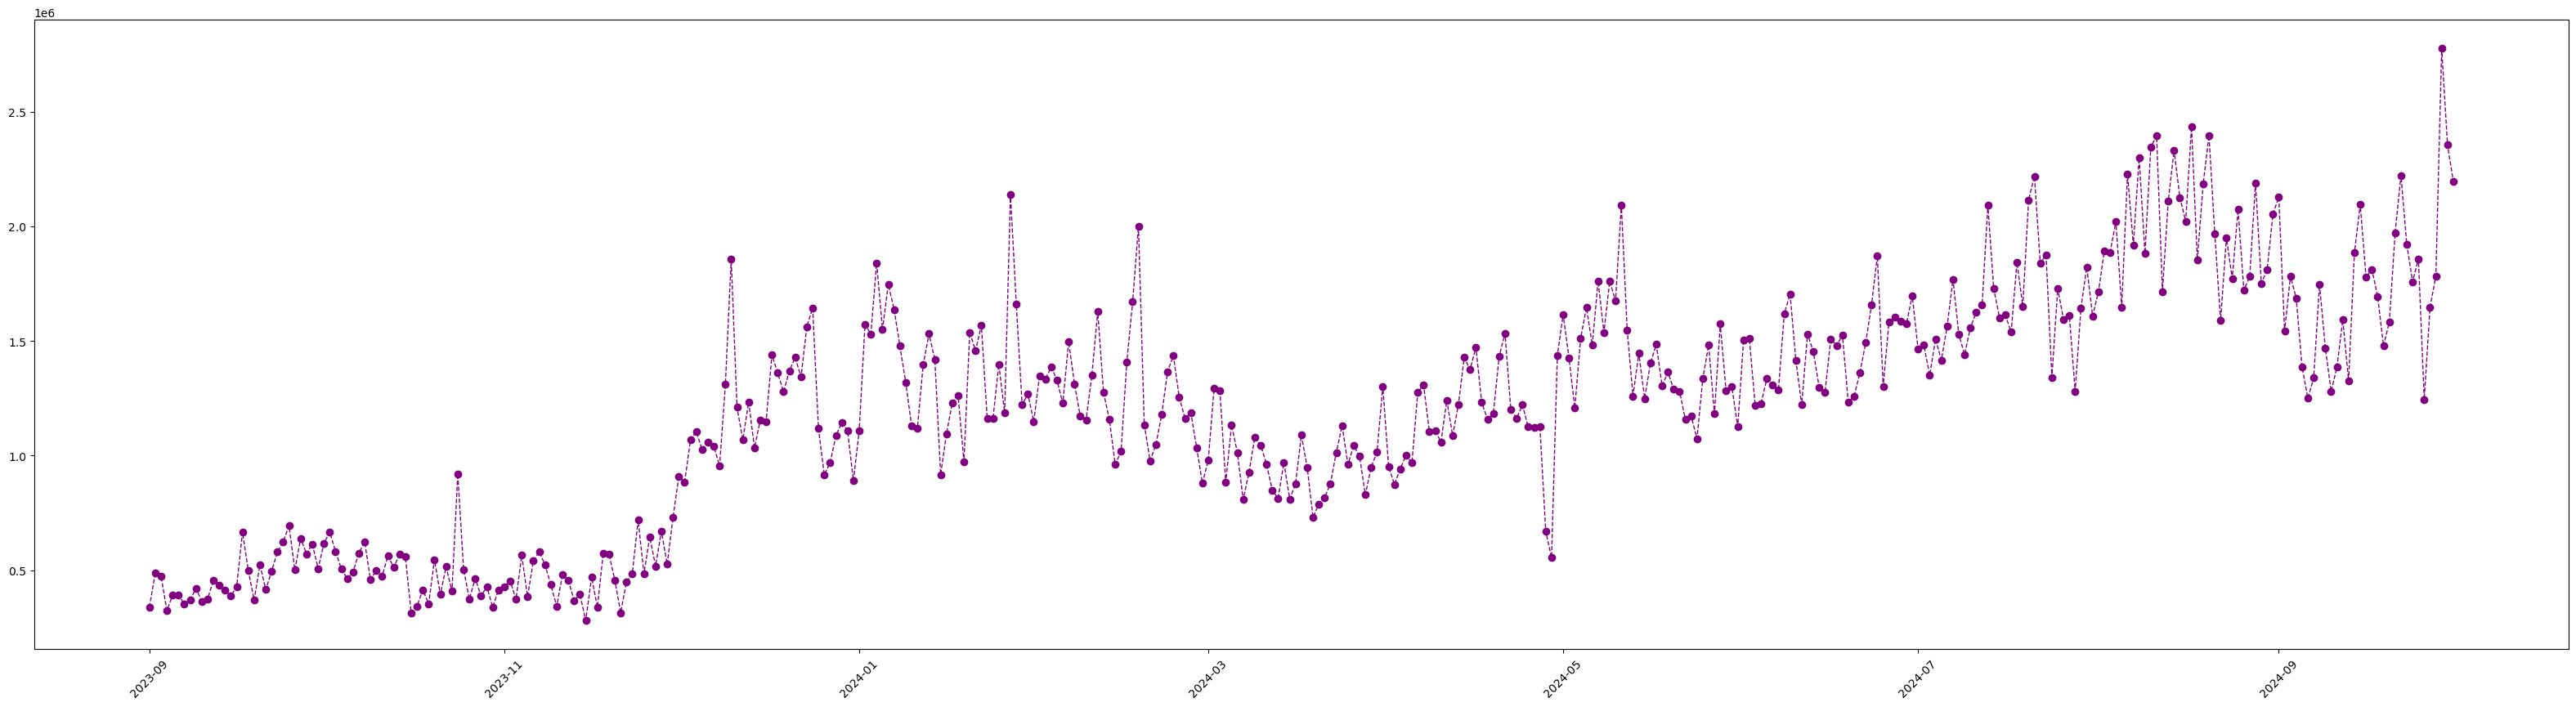

In [68]:
plt.figure(figsize=(40,10))
# x = np.arange(0,10)

df_agg = df.groupby('date')['watchtime'].sum().reset_index()
plt.plot(df_agg['date'],df_agg['watchtime'],ls='--',color='purple',linewidth=1,marker='o')
plt.xticks(rotation=45)
# plt.xlim(0)
# plt.ylim(0)
plt.show()

# fig2 = plt.figure()
# axes2 = fig2.add_axes([0,0,1,2])
# axes2.plot(df['watchtime'])


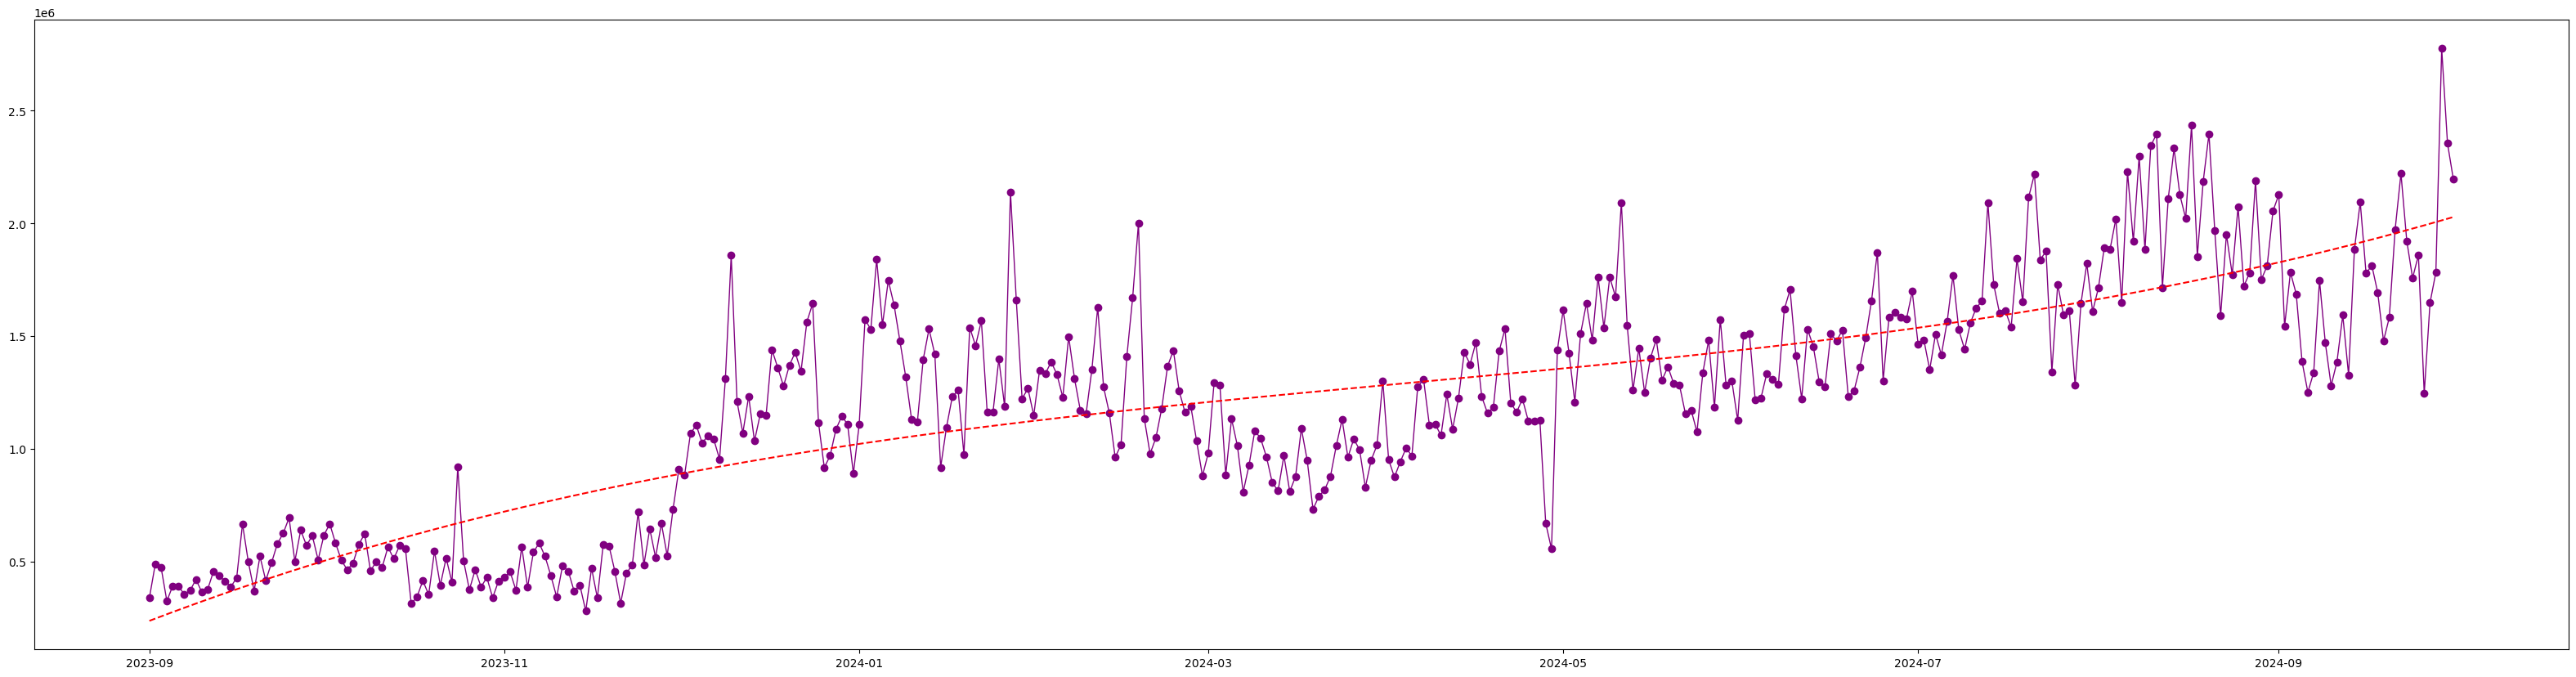

In [157]:
x = np.arange(len(df_agg))  # Индексы для x  
y = df_agg['watchtime'].values  # Значения для y  

# Вычисление коэффициентов линейной регрессии  
coefficients = np.polyfit(x,y,3)  # 1 - это степень полинома (линейная)  

potential = np.arange(len(df_agg))

predicted = coefficients[0]*potential**3 + coefficients[1]*potential**2 + coefficients[2]*potential**1  + coefficients[3]

plt.figure(figsize=(40, 10))  

# Группировка данных  
df_agg = df.groupby('date')['watchtime'].sum().reset_index()  

# Плот графика  
plt.plot(df_agg['date'], df_agg['watchtime'], ls='-', color='purple', linewidth=1, marker='o')  

plt.plot(df_agg['date'],predicted,color='red',ls='--')

In [163]:
np.polyfit(x,y,10)

array([ 7.90267624e-16, -1.50275157e-12,  1.20581598e-09, -5.29776748e-07,
        1.38163179e-04, -2.16361354e-02,  1.95428865e+00, -9.14353076e+01,
        1.73618714e+03, -1.56220311e+03,  3.57580819e+05])

In [151]:
coefficients = np.polyfit(x,y,2)
coefficients

array([-2.93572239e+00,  4.86030279e+03,  4.00594959e+05])

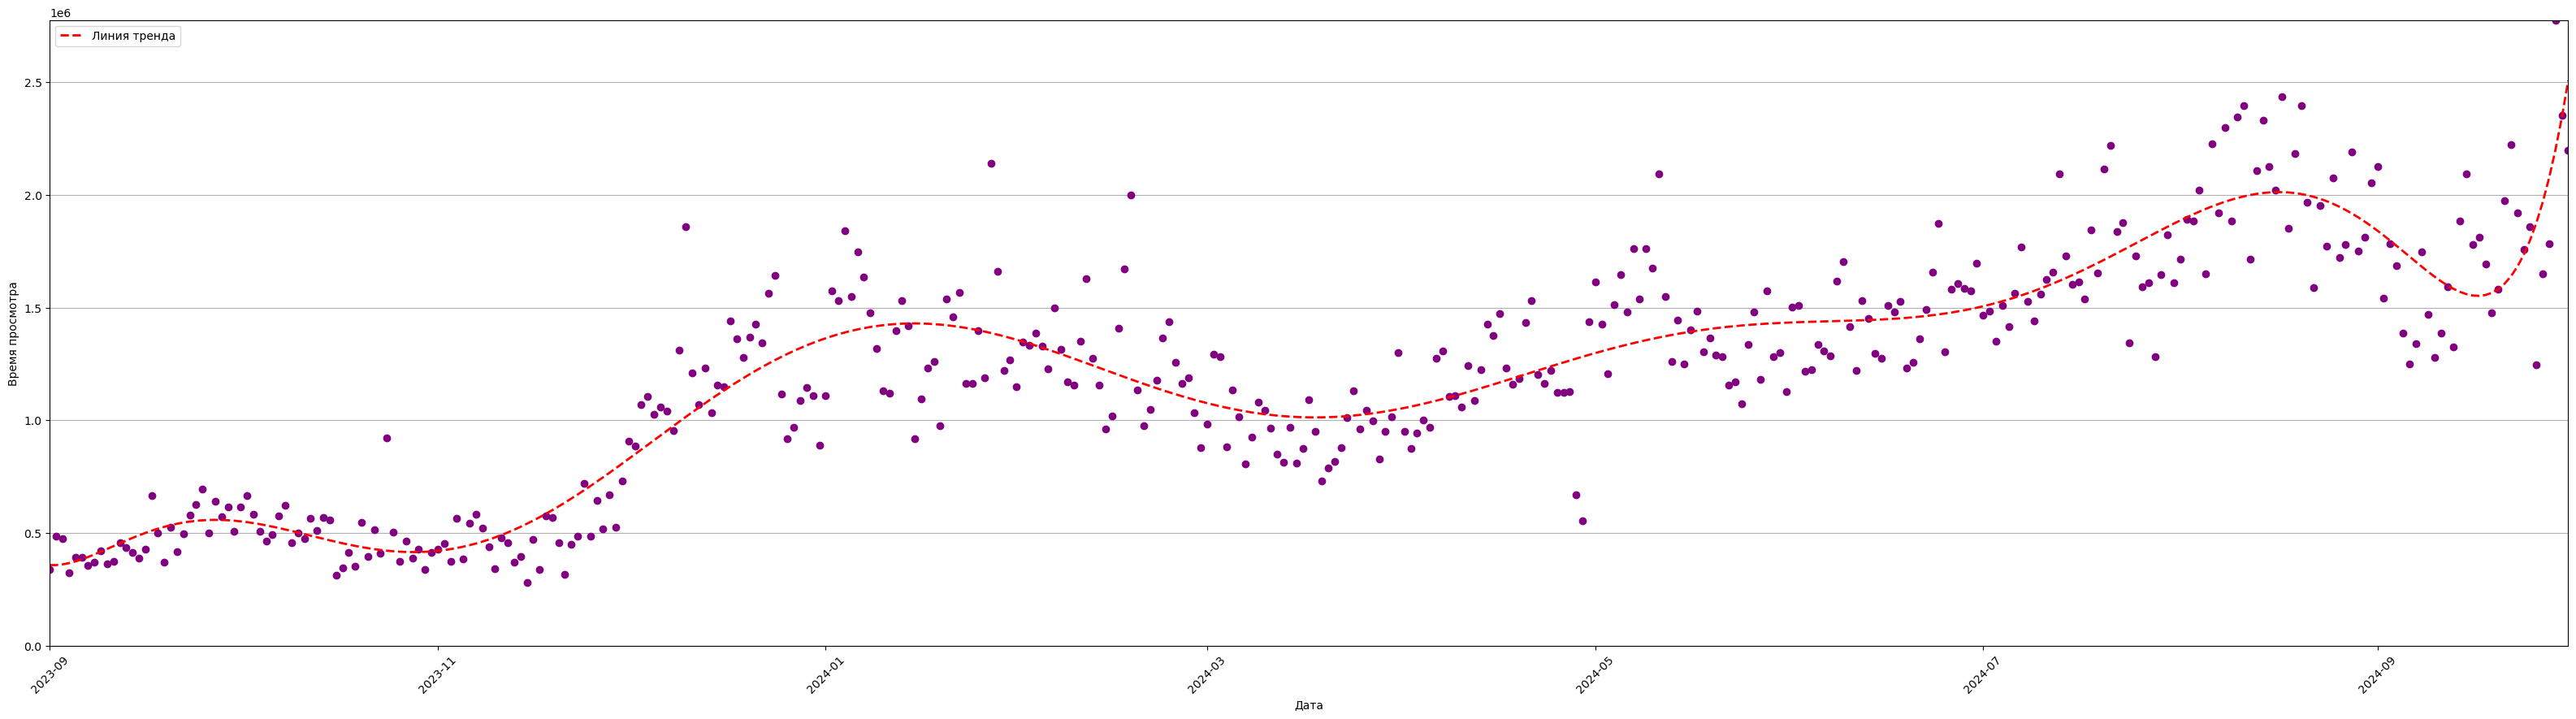

In [90]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

# Пример данных (замените это на ваш DataFrame)  
# df = pd.DataFrame({'date': pd.date_range(start='2024-01-01', periods=10, freq='D'), 'watchtime': np.random.randint(1, 100, size=10)})  

# Создание фигуры  
plt.figure(figsize=(40, 10))  

# Группировка данных  
df_agg = df.groupby('date')['watchtime'].sum().reset_index()  

# Плот графика  
plt.plot(df_agg['date'], df_agg['watchtime'], ls='', color='purple', linewidth=1, marker='o')  

# Линейная регрессия для линии тренда  
# Преобразование дат в числовой формат  
x = np.arange(len(df_agg))  # Индексы для x  
y = df_agg['watchtime'].values  # Значения для y  

# Вычисление коэффициентов линейной регрессии  
coefficients = np.polyfit(x,y,10)  # 1 - это степень полинома (линейная)  
trendline = np.polyval(coefficients, x)  # Вычисление значений трендовой линии  

# Добавление линии тренда на график  
plt.plot(df_agg['date'], trendline, color='red', linewidth=2, label='Линия тренда',ls='--')  

# Настройки графика  
plt.xticks(rotation=45)  
plt.xlim(df_agg['date'].min(), df_agg['date'].max())  # Установка пределов по оси X  
plt.ylim(0, df_agg['watchtime'].max() + 10)  # Установка пределов по оси Y  
#plt.title('График времени просмотра с линией тренда')  
plt.xlabel('Дата')  
plt.ylabel('Время просмотра')  
plt.legend()  
plt.grid(axis='y')  
# Показать график  
plt.show()

In [219]:
type(axes)

matplotlib.axes._axes.Axes

In [292]:
t1 = np.array(['abnt1','abnt1','abnt1','abnt1','abnt2','abnt2'])
t2 = np.array(['2020-01-03','2020-02-21','2020-03-08','2020-05-16','2019-02-10','2019-02-10'])
t3 = np.array(['2020-02-20','2020-03-10','2020-05-15','2020-07-26','2019-04-12','2019-04-12'])


In [294]:
t3

array(['2020-02-20', '2020-03-10', '2020-05-15', '2020-07-26',
       '2019-04-12', '2019-04-12'], dtype='<U10')

In [310]:
df = pd.DataFrame({
             'appn' : np.array(['abnt1','abnt1','abnt1','abnt1','abnt2','abnt2']),
             'valid_from_dt' : np.array(['2020-01-03','2020-02-21','2020-03-08','2020-05-16','2019-02-10','2019-02-10']),
             'valid_to_dt': np.array(['2020-02-20','2020-03-10','2020-05-15','2020-07-26','2019-04-12','2019-04-12'])
            })

In [312]:
df

,appn,valid_from_dt,valid_to_dt
0,abnt1,2020-01-03,2020-02-20
1,abnt1,2020-02-21,2020-03-10
2,abnt1,2020-03-08,2020-05-15
3,abnt1,2020-05-16,2020-07-26
4,abnt2,2019-02-10,2019-04-12
5,abnt2,2019-02-10,2019-04-12


In [314]:
import pandasql as psql 

In [366]:
df = pd.DataFrame({
             'appn' : np.array(['abnt1','abnt1','abnt1','abnt1','abnt2','abnt2']),
             'valid_from_dt' : np.array(['2020-01-03','2020-02-21','2020-03-08','2020-05-16','2019-02-10','2019-02-10']),
             'valid_to_dt': np.array(['2020-02-20','2020-03-10','2020-05-15','2020-07-26','2019-04-12','2019-04-12'])
            })

query = '''
SELECT  *
FROM (SELECT 
      appn,
      valid_from_dt,
      lead(valid_from_dt) OVER ( PARTITION BY appn ORDER BY valid_from_dt) AS next_valid_from_dt,
      valid_to_dt
      FROM df
      ORDER BY 1
    )
WHERE next_valid_from_dt<=valid_to_dt
'''



psql.sqldf(query)

,appn,valid_from_dt,next_valid_from_dt,valid_to_dt
0,abnt1,2020-02-21,2020-03-08,2020-03-10
1,abnt2,2019-02-10,2019-02-10,2019-04-12


In [342]:
query = '''
            SELECT 
                appn,
                valid_from_dt,
                lead(valid_from_dt) OVER (ORDER BY valid_from_dt) AS next_valid_from_dt,
                valid_to_dt,
                lead(valid_to_dt) OVER (ORDER BY valid_to_dt) AS next_valid_to_dt
                FROM df
                ORDER BY 1
                '''

psql.sqldf(query)

,appn,valid_from_dt,next_valid_from_dt,valid_to_dt,next_valid_to_dt
0,abnt1,2020-01-03,2020-02-21,2020-02-20,2020-03-10
1,abnt1,2020-02-21,2020-03-08,2020-03-10,2020-05-15
2,abnt1,2020-03-08,2020-05-16,2020-05-15,2020-07-26
3,abnt1,2020-05-16,None,2020-07-26,None
4,abnt2,2019-02-10,2019-02-10,2019-04-12,2019-04-12
5,abnt2,2019-02-10,2020-01-03,2019-04-12,2020-02-20


In [231]:
def palindrome(nums: int) -> bool:
    s = str(nums)
    if len(s)<2: 
        return False
    rev = s[::-1]
    if s == rev:
        return True
    else:
        return False 
        
        

palindrome(11)

True

In [369]:
def isPalindrome(x: int) -> bool:
    if (x != 0 and x % 10 == 0) or (0<x<10):
        return False 

    half = 0
    while x > half:
        half = (half * 10) + (x % 10)
        x = x // 10
    return x == half or x == half // 10

In [371]:
palidrome2(23)

In [379]:
def reverse(x: int) -> int:
        s = str(x)
        r = s[::-1]
        return int(r)

In [380]:
reverse(124)

421

In [474]:
l = [5]
a = 5

def search(l:list[int],t:int) ->int:
    for i,val in enumerate(l):
        if val==t:
            print(i,val)
                         
                   

In [475]:
search(l,a)

0 5


In [468]:
def search(l: list[int], t: int) -> None:  
    for i, val in enumerate(l):  # итерируемся по значениям в списке l  
        if val == t:  # проверяем, равно ли значение t  
            print(i, val)  # выводим индекс и значение  

search(l, a)  

8 5


In [7]:
def binary_search(nums:list[int],target:int)-> int:
    l,r = 0,len(nums) - 1
    while l<=r:
        m = (l+r)//2
        if target < nums[m]:
            r = m - 1
        elif target > nums[m]:
            l = m + 1
        else:
            print(m)
            break

In [17]:
l = list(np.arange(-1000,1001,1))

binary_search(nums=l,target=0)

1000


In [11]:
nums = [-4,-1,1, 2, 3, 4, 5,6,7]
target = 1
l, r = 0, len(nums) - 1
while l <= r:
    m = (l + r) // 2
    if target < nums[m]:
        r = m - 1
    elif target > nums[m]:
        l = m + 1
    else:
        print(m)
        break

2


In [160]:
def simple_num(num:int)-> bool:
    for i in range(2,num//2+1):
        if num % i == 0:
            return False 
    return True
        
simple_num(4)

False